           Date          Open          High           Low         Close  \
0    2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703   
1    2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2    2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
3    2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
4    2021-01-04  32810.949219  33440.218750  28722.755859  31971.914063   
..          ...           ...           ...           ...           ...   
208  2021-07-27  37276.035156  39406.941406  36441.726563  39406.941406   
209  2021-07-28  39503.187500  40816.070313  38862.437500  39995.906250   
210  2021-07-29  39995.453125  40593.070313  39352.058594  40008.421875   
211  2021-07-30  40027.484375  42235.546875  38397.355469  42235.546875   
212  2021-07-31  42196.304688  42231.449219  41110.832031  41626.195313   

        Adj Close       Volume  
0    29001.720703  46754964848  
1    29374.152344  40730301359  


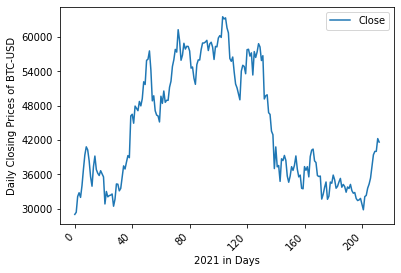

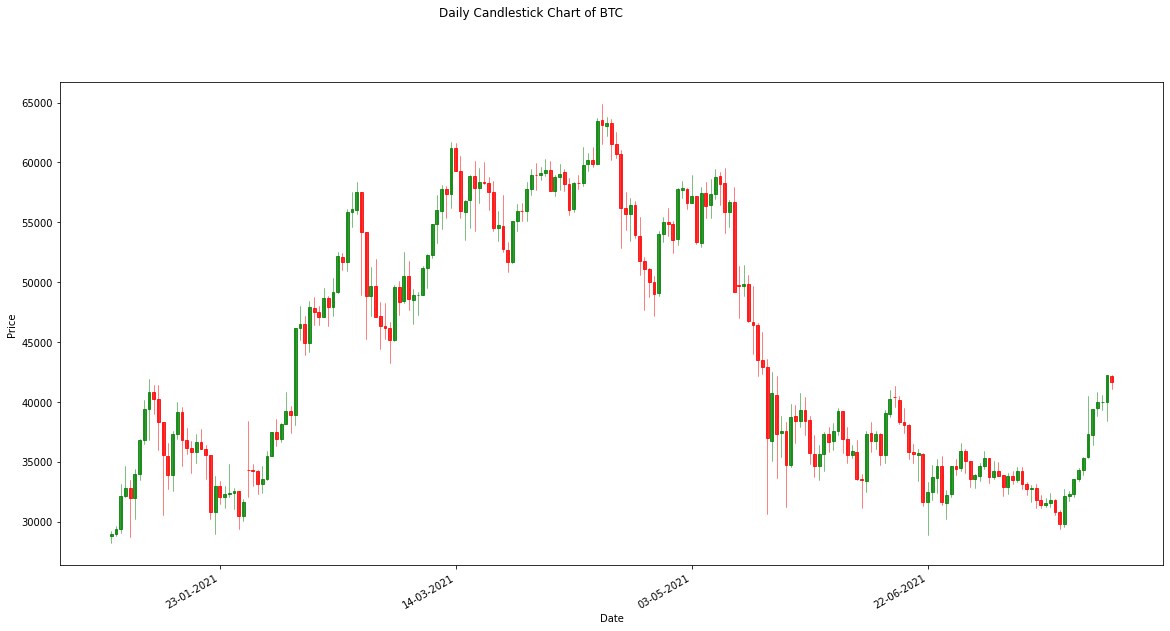

In [14]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

ticker = 'BTC-USD'
period1 = int(time.mktime(datetime.datetime(2021, 1, 1, 0, 1).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 8, 1, 0, 1).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
print(df)

# x-values, the dates
dates = df[['Date']]
dates = dates.values.tolist()
dates = ['January 1st', 'February 1st', 'March 1st', 'April 1st', 'May 1st', 'June 1st', 'July 1st']

# y-values, the prices
close = df[['Close']]
close = close.values.tolist()

# both values in one frame
data = df[['Date', 'Close']]

# the plot
ticks = list(range(0,213))

ax = data.plot()
# ax.set_xticklabels(dates)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('2021 in Days')
plt.ylabel(f'Daily Closing Prices of {ticker}')

plt.show()

####  trial  ######

ohlc = df.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candle = candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of BTC')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.show()





